# PERS data analysis
this kernel will look at the PERS dataset. PERS is the pension plan as provided to public employees of the state of Oregon. This is an interesting dataset as PERS has been in the local news for paring own its payouts to new retirees due to not having enough money. This will help us see where the money is going to. 

The dataset contains 11 columns: id, name, lastname, firstname, init, gross, retire, plan, service, salary and calc. 

* **id** is an integer value given to each row, starting at 1. The id is numbered when the dataset is sorted alphabeticaly by last name. 
* **name** is the full name of the retiree
* **lastname** is the last name of the retiree
* **firstname** is the first name of the retiree
* **init** is the middle initial of the retiree
* **gross** is the monthly benefit allotted to the retiree
* **retire** is the retire date of the retiree
* **plan** is the plan type the retiree had signed up for. 
  - **Tier One** were hired before 1996, are guaranteed a rate of return on their account balances equal to the assumed earnings rate, which has varied from 5 percent to 8 percent annually. Before 2003, when investment returns were higher, PERS often passed them through to members. Before 2003, members' 6 percent contributions went into the pension fund and earned investment returns. That inflated balances and benefits for those retiring under the money match formula. In some cases, benefits exceed final  salary. Reforms in 2003 diverted member contributions into individual accounts, out of the money match calculation and the return guarantee. They also capped investment earning crediting on accounts at the assumed earnings rate — 8 percent today. Normal retirement age is 58.
  - **Tier Two** were hired from Jan. 1, 1996 to Aug. 28, 2003, have no return guarantee on accounts, and get market returns. Normal retirement age is 60, or after 30 years service.
  - **OPSRP** (Oregon Public Service Retirement Program) employees, hired on or after Aug. 29, 2003, do not have the option to retire under money match. Their benefit formula also is less generous. Normal retirement age is 65.
* **service** is the number of months the retiree worked for under the PERS program
* **salary** is the monthly average of the high three calendar years' salary over a member's career as reported by employers. Data was aggregated into years based on paid date. The three highest totals were added together and divided by 36 to create a monthly salary amount. No determination was made whether the amount for a year represents a full or partial year. Amounts were used for a full year even in cases of a partial year. If a benefit recipient did not have three separate years in which salary was earned, the total salary was divided by either 24 or 12 depending if the salary was earned all within one or two separate years. Salary does not include the 6 percent member contribution if paid by an employer.
* **calc** is the calculation method for the payout PERS uses up to four methods (depending on eligibility) to calculate Tier One and Tier Two retirement benefits: Full Formula, Money Match, Formula Plan Annuity, and 50 percent of Final Salary (only available for Police & Fire Duty Disability). Judge retirements are shown as Full Formula. The OPSRP Pension Program uses a formula method only. Benefits get calculated in one of three ways. The dominant method is shifting from money match to full formula. Money match provides far more generous benefits for older employees. Full Formula is supposed to replace 50 percent of final salary after 30 years of service.
  - **Money Match:** Employee's account balance at retirement is matched by employer(s), and the balance is annuitized over the member's life expectancy. Members also receive annual cost of living adjustment, or COLA, up to 2 percent.

  - **Full Formula:** Member's monthly final salary is multiplied by years of creditable service; that sum is multipied 1.67 percent for general employees; 2.0 percent for police and fire. (For hires after Aug. 29, 2003, it's 1.5 percent for general employees; 1.8 percent for police and fire.) Annual COLA up to 2 percent.

  - **Formula Plus Annuity:** Only available to members who made contributions before Aug. 21, 1981, it annuitizes a member's account balance; then adds one percent of the final salary (1.35 percent for legislators, police and firefighters) multiplied by years of creditable service. COLA up to 2 percent.

In [1]:
## import data analysis libraries and data vis libraries

import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# import the data
df = pd.read_csv('/Users/thejason/Documents/datasets/PERS Public Record Results Jan 1 2018.csv')

In [3]:
df.head()

,id,name,lastname,firstname,init,gross,retire,plan,service,salary,calc
0,1,"AAB, LARRY A",AAB,LARRY,A,5886.30,2011-01-01,Tier One,331.0,10181.33,Formula Plus Annuity
1,2,"AABERG, DONALD R",AABERG,DONALD,R,5182.13,2001-03-01,Tier One,181.0,866.72,NaN
2,3,"AABY, MARY E",AABY,MARY,E,1000.74,2011-05-01,Tier One,183.0,3464.18,Full Formula
3,4,"AAGAARD, JOANNE D",AAGAARD,JOANNE,D,2406.03,1997-01-01,Tier One,230.0,3513.47,Money Match
4,5,"AALBERG, JEFFREY L",AALBERG,JEFFREY,L,3361.50,2013-01-01,Tier One,300.0,5867.91,NaN


In [4]:
df.describe(include='all')

,id,name,lastname,firstname,init,gross,retire,plan,service,salary,calc
count,129544.000000,129544,129540,129537,120025,129544.000000,129544,129544,129542.000000,123373.00000,116609
unique,NaN,127481,37049,8182,26,NaN,536,10,NaN,NaN,4
top,NaN,"JONES, ROBERT E",SMITH,ROBERT,L,NaN,1998-03-01,Tier One,NaN,NaN,Money Match
freq,NaN,7,1176,2604,17378,NaN,3249,109044,NaN,NaN,63731
mean,64772.500000,NaN,NaN,NaN,NaN,2690.518737,NaN,NaN,247.741759,4119.84693,NaN
std,37396.275973,NaN,NaN,NaN,NaN,2143.828329,NaN,NaN,105.656891,2363.34559,NaN
min,1.000000,NaN,NaN,NaN,NaN,1.130000,NaN,NaN,1.000000,0.75000,NaN
25%,32386.750000,NaN,NaN,NaN,NaN,1013.902500,NaN,NaN,165.000000,2582.14000,NaN
50%,64772.500000,NaN,NaN,NaN,NaN,2181.425000,NaN,NaN,256.000000,3882.69000,NaN
75%,97158.250000,NaN,NaN,NaN,NaN,3923.182500,NaN,NaN,339.000000,5227.34000,NaN


In [5]:
# we don't really care for names so we'll drop the 4 columns pertaining to it. This frees up any data cleaning we
# need to do for the cells with missing name values
df = df.drop(['name','lastname','firstname','init'],axis=1)

In [6]:
# next we'll convert the monthly columns (gross, service, and salary) to yearly values and drop the monthly columns
df['yr_benefit'] = df.gross*12
df['yr_service'] = df.service/12
df['yr_salary'] = df.salary*12

df = df.drop(['gross','service','salary'],axis=1)


In [7]:
df.describe(include='all')

,id,retire,plan,calc,yr_benefit,yr_service,yr_salary
count,129544.000000,129544,129544,116609,129544.000000,129542.000000,1.233730e+05
unique,NaN,536,10,4,NaN,NaN,NaN
top,NaN,1998-03-01,Tier One,Money Match,NaN,NaN,NaN
freq,NaN,3249,109044,63731,NaN,NaN,NaN
mean,64772.500000,NaN,NaN,NaN,32286.224849,20.645147,4.943816e+04
std,37396.275973,NaN,NaN,NaN,25725.939954,8.804741,2.836015e+04
min,1.000000,NaN,NaN,NaN,13.560000,0.083333,9.000000e+00
25%,32386.750000,NaN,NaN,NaN,12166.830000,13.750000,3.098568e+04
50%,64772.500000,NaN,NaN,NaN,26177.100000,21.333333,4.659228e+04
75%,97158.250000,NaN,NaN,NaN,47078.190000,28.250000,6.272808e+04


### Data Cleaning
Now the dataset is a little more intuitive. let's tackle the data cleaning. There are three columns with missing data: calc, yr_service, and yr_salary. 

Calc is missing over 10k entries. We'll explore what the best way to handle this is.

yr_service is missing 2 entries. This isn't much, so we'll just remove these entries. 

yr_salary is missing about 6k entries. For this imputation, we'll first calculate the ratio between yr_benefit and yr_salary. The mean average ratio will be multiplied against the yr_benefit to fill the missing yr_salary values. 

In [8]:
# I don't know how to do the first one easily. i could brute force it, but I'm too lazy. So I'm going to see if
# if anyone responds on stackoverflow. Till then, moving on. 
df['calc'] = df.groupby('plan')['calc'].apply(lambda x: x.fillna(x.mode()[0]))
# tier_one_mode = mode(df.calc.astype(str)[df.plan=='Tier One'],nan_policy='omit')

In [9]:
# remove rows where yr_service is NaN
df = df[pd.notnull(df.yr_service)]

In [10]:
# calculate the yr_benefit/yr_salary ratio
df = df.assign(ben_sal_ratio = df['yr_benefit']/df['yr_salary'])

In [11]:
# calculate the imputations for yr_salary
ratio_mean = np.mean(df.ben_sal_ratio)
df['yr_salary'] = df['yr_salary'].fillna(df['yr_benefit']*ratio_mean)
df['ben_sal_ratio'] = df['ben_sal_ratio'].fillna(ratio_mean)

In [12]:
df.describe(include='all')

,id,retire,plan,calc,yr_benefit,yr_service,yr_salary,ben_sal_ratio
count,129542.000000,129542,129542,129542,129542.000000,129542.000000,1.295420e+05,129542.000000
unique,NaN,536,10,4,NaN,NaN,NaN,NaN
top,NaN,1998-03-01,Tier One,Money Match,NaN,NaN,NaN,NaN
freq,NaN,3249,109042,74816,NaN,NaN,NaN,NaN
mean,64772.120748,NaN,NaN,NaN,32286.618560,20.645147,4.777840e+04,0.745706
std,37396.439342,NaN,NaN,NaN,25725.937877,8.804741,2.880320e+04,11.359805
min,1.000000,NaN,NaN,NaN,13.560000,0.083333,9.000000e+00,0.005852
25%,32386.250000,NaN,NaN,NaN,12167.160000,13.750000,2.892246e+04,0.357899
50%,64771.500000,NaN,NaN,NaN,26177.520000,21.333333,4.514322e+04,0.613688
75%,97158.750000,NaN,NaN,NaN,47078.250000,28.250000,6.177456e+04,0.931500


In [13]:
# change retire to datetime format. add hire_date variable to set startdate 
df['retire'] = pd.to_datetime(df['retire'])
df['yr_service_dt'] = pd.to_timedelta(df['yr_service'],unit='Y')
df['hire_date'] = df['retire']-df['yr_service_dt']

alright! all of the NaNs have been removed. Now we can move on to data exploration
## Data Exploration

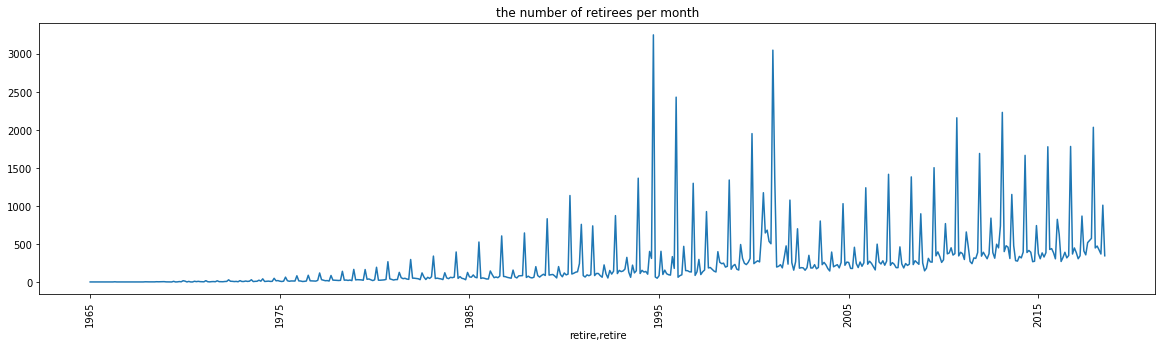

In [14]:
plt.figure(figsize=(20,5))
ax = df.groupby([df["retire"].dt.year, df["retire"].dt.month]).count()['id'].plot(kind='line')
plt.xticks(rotation=90)
plt.title('the number of retirees per month')
ax.set_xticklabels([0,1965,1975,1985,1995,2005,2015])
plt.show()

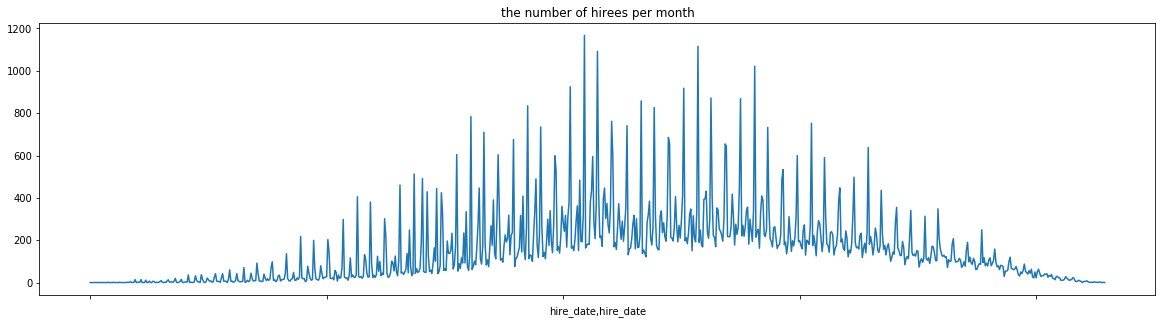

In [15]:
plt.figure(figsize=(20,5))
ax = df.groupby([df["hire_date"].dt.year, df["hire_date"].dt.month]).count()['id'].plot(kind='line')
plt.xticks(rotation=90)
plt.title('the number of hirees per month')
# ax.set_xticklabels([0,1965,1975,1985,1995,2005,2015])
plt.show()

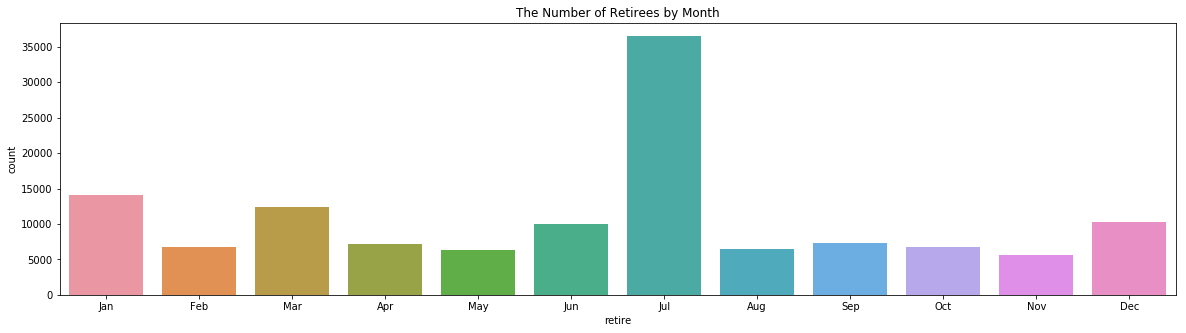

In [16]:
plt.figure(figsize=(20,5))
ax = sns.countplot(df["retire"].dt.month)
xlabel = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(xlabel)
plt.title('The Number of Retirees by Month')
plt.show()
# plt.xticks(rotation=45)

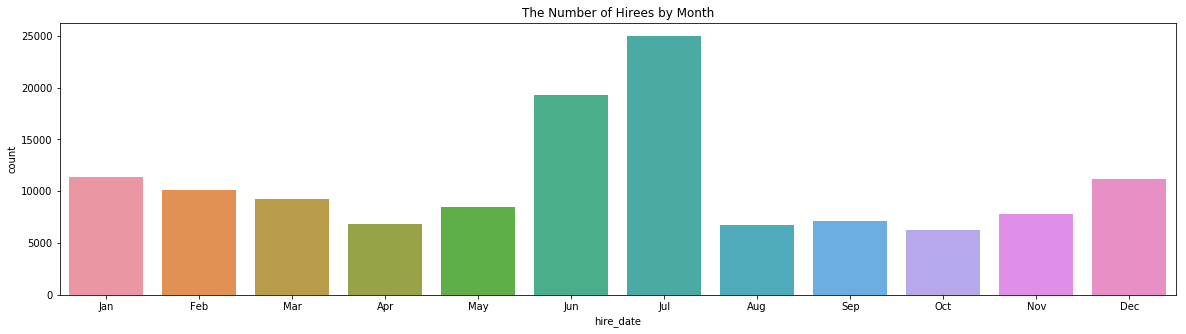

In [17]:
plt.figure(figsize=(20,5))
ax = sns.countplot(df["hire_date"].dt.month)
xlabel = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(xlabel)
plt.title('The Number of Hirees by Month')
plt.show()
# plt.xticks(rotation=45)

We see that July is predominantly the most common month that people choose to retire. This makes sense as the bulk of PERS employees are teachers. The school year ends in June so that is the last month of employment prior to summer vacation. 

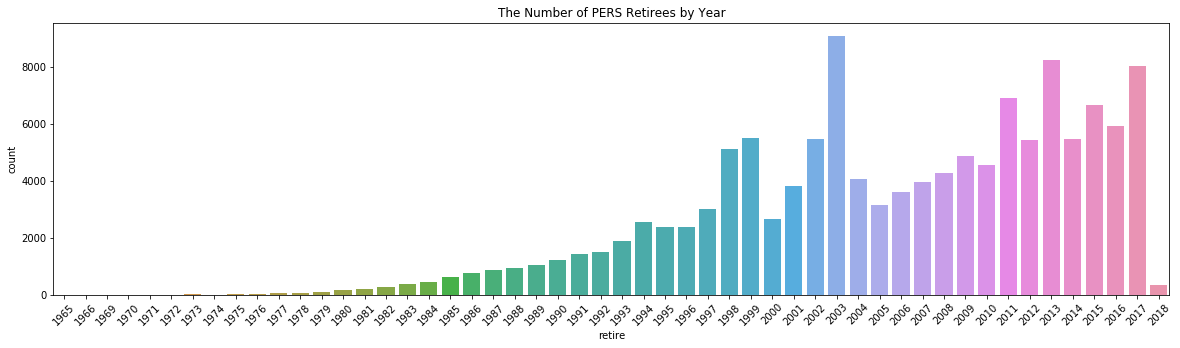

In [18]:
plt.figure(figsize=(20,5))
sns.countplot(df["retire"].dt.year)
plt.xticks(rotation=45)
plt.title('The Number of PERS Retirees by Year')
plt.show()

Here we see a very slow ramp up on the number of retirees in the first half. This makes sense as there were fewer people on the PERS plan when it started. Perhaps only new employees were eligible on the PERS plan when it was first introduced, thus unlikely that they were near retirement. Once we get into the 1980's, we see some noticeable numbers in the number of retirees and seems to increase in a linear or binomial curve until the mid 1990's. 

We also see a few anomalies in 1998, 1999, 2003 and a few other peaks in the 2010's. It would be interesting to relate these events to any changes in the PERS program that would encourage people to retire in a particular year. 

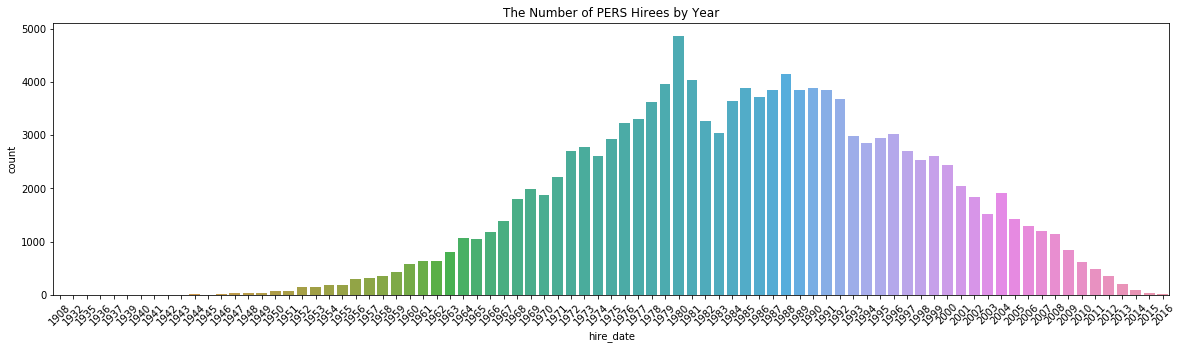

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(df["hire_date"].dt.year)
plt.xticks(rotation=45)
plt.title('The Number of PERS Hirees by Year')
plt.show()

At first glance, we see that it is almost a bell curve. It is important to note that this data set includes only people who have already retired. As such, it become less likely for people to have already retired as we get closer to the present. 

But the ramp up of hirees starting in the 30's all the way to its peak in 1980 is notable. If the average age of retirement is 60 (although recently increased), and one starts work at 20, then we are looking at 40 years of work. The dataset encompasses up to 2018 so people who are retiring this year started work in 1978. The graph makes sense in terms of its decomposing count of hirees after 1980. 

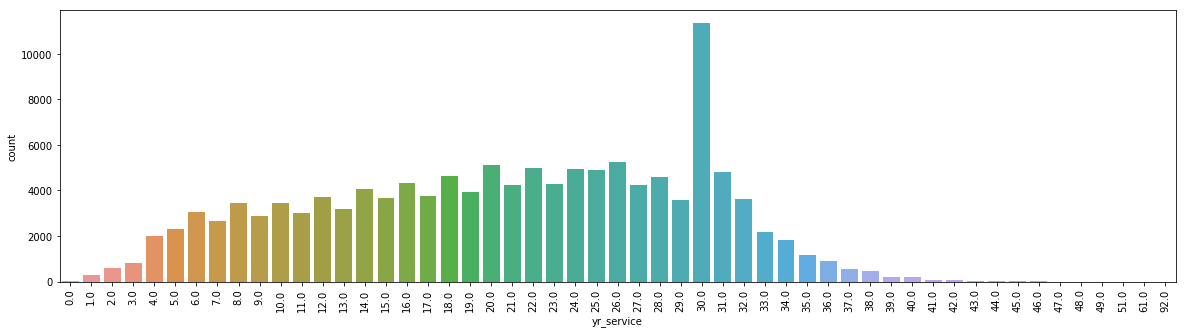

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(df['yr_service'].round())
plt.xticks(rotation=90)
plt.show()

A very notable peak at the 30 year mark! There must be some reason in the PERS terms and conditions that give a much higher payout if one works 30 years. There is also an interesting pattern of high-low between 5 and 29 years. Is that just coincidence? 

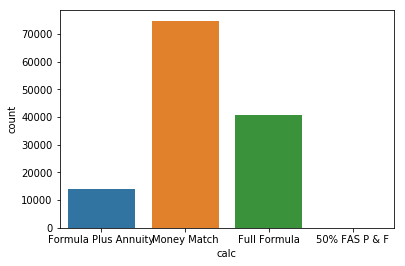

In [21]:
sns.countplot(df['calc'])

/Users/thejason/env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


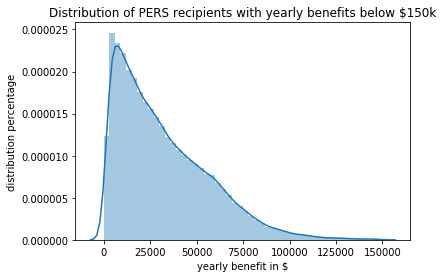

In [22]:
sns.distplot(df['yr_benefit'][df['yr_benefit']<150000])
plt.title('Distribution of PERS recipients with yearly benefits below $150k')
plt.xlabel('yearly benefit in $')
plt.ylabel('distribution percentage')
plt.show()

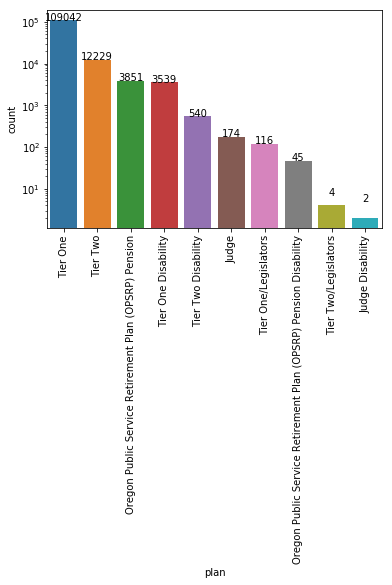

In [23]:
ax = sns.countplot(df['plan'],order = df['plan'].value_counts().index)
ax.set(yscale='log')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 
plt.xticks(rotation=90)
plt.show()

/Users/thejason/env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


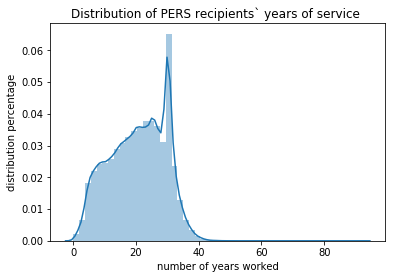

In [24]:
sns.distplot(df['yr_service'])
plt.title('Distribution of PERS recipients` years of service ')
plt.xlabel('number of years worked')
plt.ylabel('distribution percentage')
plt.show()

There is a large peak at around 35 years of service. I wonder if this is related to a certain start date/end date combination. Perhaps the first group of people who started on PERS in 1955 were eligible for retiring after 35 years of service so they all chose to retire at that time. You also see a dip right before, likely meaning that the people opted to work for one more year for extra benefits. It may be even simpler as a condition within PERS stipulating extra return on benefits if they worked 35 years.  

### Money allocated by yearly benefit category
Now let's take a look at how much cumulative cost each category is. Category is broken down by a range of benefit. 

1. 0-5000
2. 5001-25000
3. 25001-75000
4. 75001-150000
5. greater than 150000

In [25]:
df['yr_ben_cat'] = pd.cut(df['yr_benefit'], bins=[-1, 25000, 50000, 80000, 10000000])
# labels = np.array('1 2 3 4 5'.split())
# df['yr_ben_cat'] = labels[df['yr_ben_cat']]

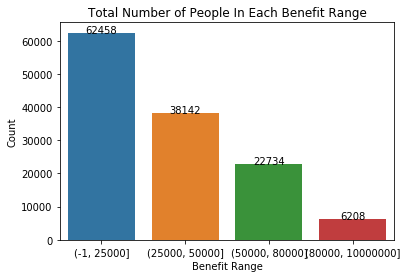

In [26]:
ax = sns.countplot(df['yr_ben_cat'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center")
plt.title('Total Number of People In Each Benefit Range')
plt.xlabel('Benefit Range')
plt.ylabel('Count')
plt.show()

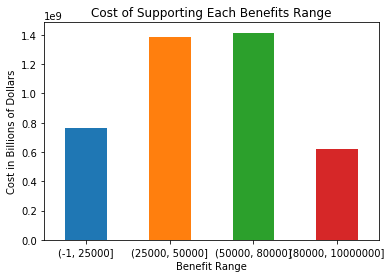

In [27]:
ax = df.groupby('yr_ben_cat').sum()['yr_benefit'].plot(kind='bar')
plt.title('Cost of Supporting Each Benefits Range')
plt.xlabel('Benefit Range')
plt.xticks(rotation=0)
plt.ylabel('Cost in Billions of Dollars')
plt.show()

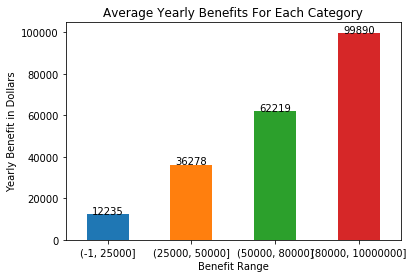

In [28]:
ax = (df.groupby('yr_ben_cat').sum()['yr_benefit']/df.groupby('yr_ben_cat').count()['yr_benefit']).plot(kind='bar')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center")
plt.title('Average Yearly Benefits For Each Category')
plt.xlabel('Benefit Range')
plt.xticks(rotation=0)
plt.ylabel('Yearly Benefit in Dollars')
plt.show()

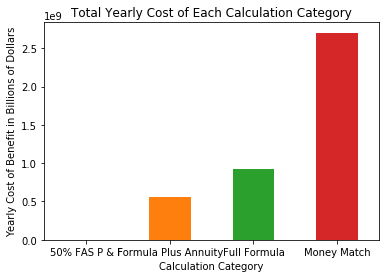

In [29]:
df.groupby('calc').sum()['yr_benefit'].plot(kind='bar')
plt.title('Total Yearly Cost of Each Calculation Category')
plt.ylabel('Yearly Cost of Benefit in Billions of Dollars')
plt.xlabel('Calculation Category')
plt.xticks(rotation=0)
plt.show()

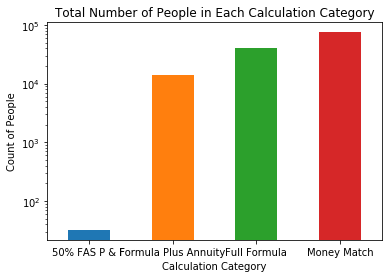

In [30]:
df.groupby('calc').count()['yr_benefit'].plot(kind='bar',logy=True)
plt.title('Total Number of People in Each Calculation Category')
plt.ylabel('Count of People')
plt.xlabel('Calculation Category')
plt.xticks(rotation=0)
plt.show()

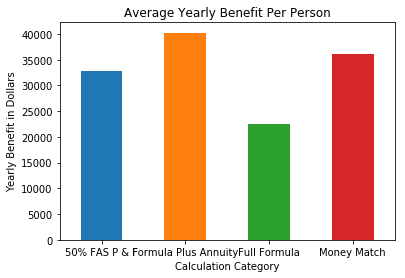

In [31]:
(df.groupby('calc').sum()['yr_benefit']/df.groupby('calc').count()['yr_benefit']).plot(kind='bar')
plt.title('Average Yearly Benefit Per Person')
plt.ylabel('Yearly Benefit in Dollars')
plt.xlabel('Calculation Category')
plt.xticks(rotation=0)
plt.show()

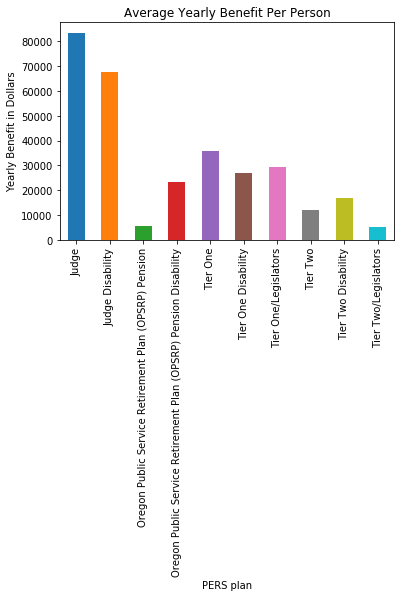

In [32]:
(df.groupby('plan').sum()['yr_benefit']/df.groupby('plan').count()['yr_benefit']).plot(kind='bar')
plt.title('Average Yearly Benefit Per Person')
plt.ylabel('Yearly Benefit in Dollars')
plt.xlabel('PERS plan')
plt.xticks(rotation=90)
plt.show()

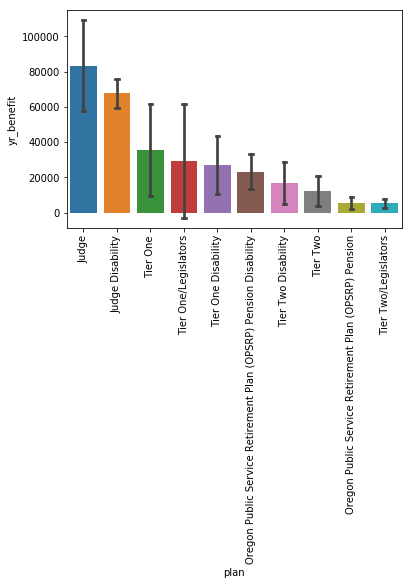

In [33]:
order = df.groupby('plan').mean()['yr_benefit'].sort_values(ascending=False).index
sns.barplot(x='plan',y='yr_benefit',data=df,ci='sd',capsize=.1,order=order)
plt.xticks(rotation=90)
plt.show()

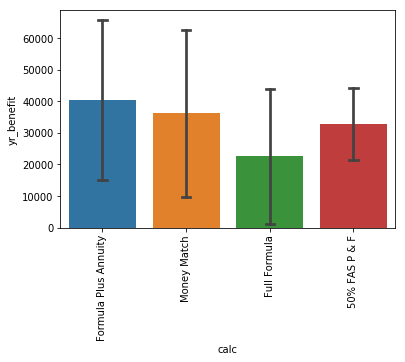

In [34]:
sns.barplot(x='calc',y='yr_benefit',data=df,ci='sd',capsize=.1)
plt.xticks(rotation=90)
plt.show()

In [35]:
df['year'] = df["retire"].dt.year

I want to plot the average years served for each year someone retired. 

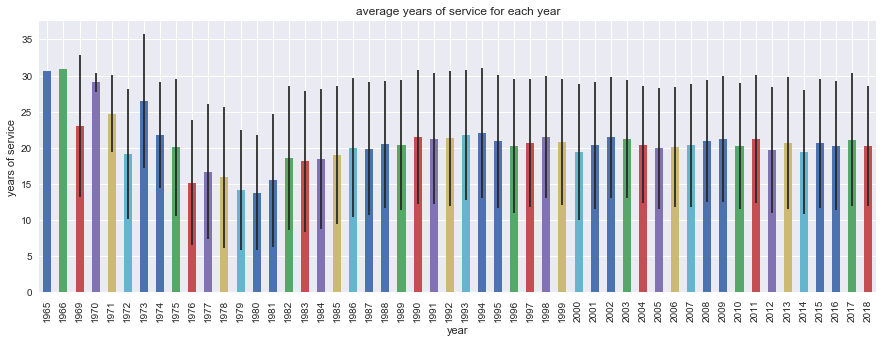

In [36]:
std = df.groupby('year')['yr_service'].std()
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
df.groupby('year').mean()['yr_service'].plot(kind='bar',yerr=std)
plt.title('average years of service for each year')
plt.ylabel('years of service')
plt.show()

Text(0.5,1,'average benefit to salary ratio by calculation group')

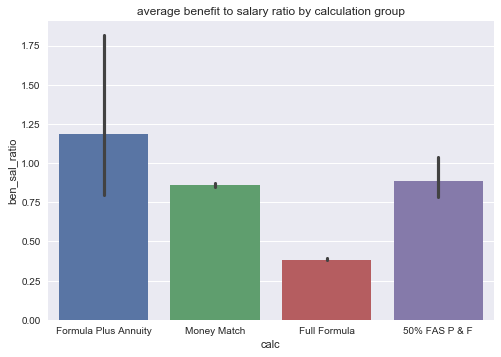

In [37]:
sns.barplot(x='calc',y='ben_sal_ratio',data=df)
plt.title('average benefit to salary ratio by calculation group')

Text(0.5,1,'average benefit to salary ratio by benefit range category')

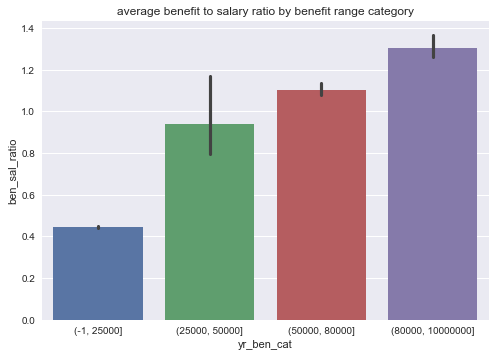

In [38]:
sns.barplot(x='yr_ben_cat',y='ben_sal_ratio',data=df)
plt.title('average benefit to salary ratio by benefit range category')

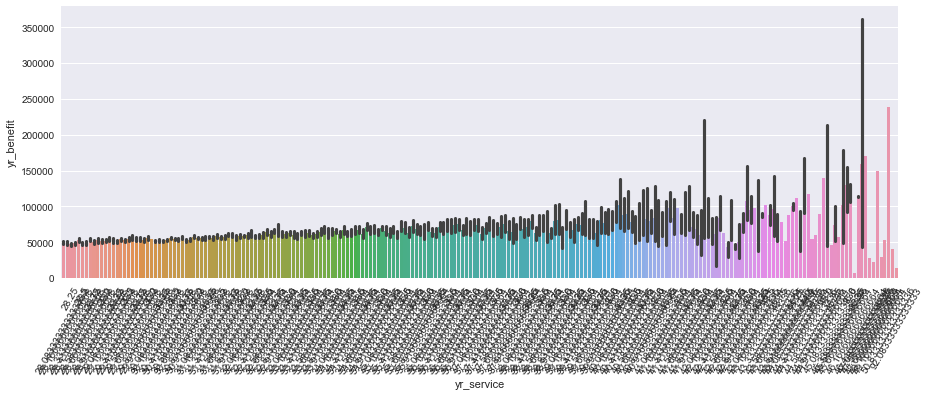

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(x='yr_service',y='yr_benefit',data=df[df['yr_service']>28])
plt.xticks(rotation=60)
plt.show()

In [40]:
df['yr_service_round'] = np.round(df['yr_service'])


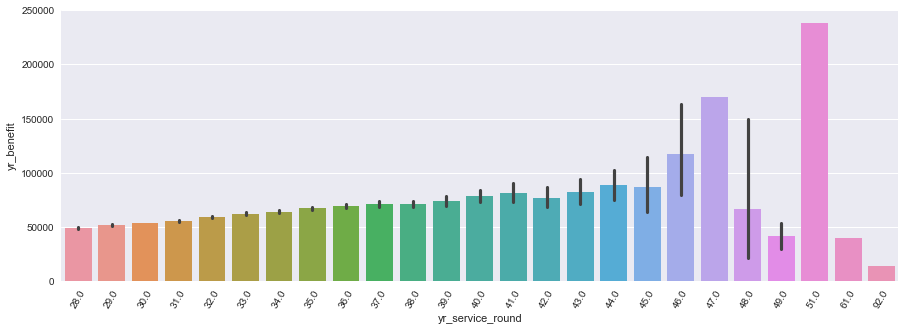

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(x='yr_service_round',y='yr_benefit',data=df[df['yr_service']>28])
plt.xticks(rotation=60)
plt.show()

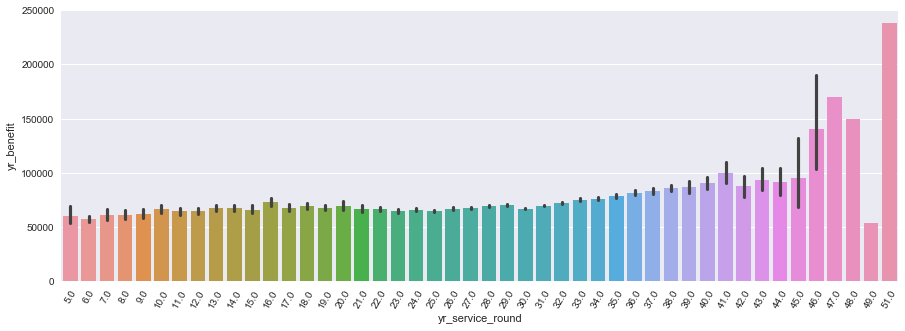

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(x='yr_service_round',y='yr_benefit',data=df[df['yr_benefit']>50000])
plt.xticks(rotation=60)
plt.show()

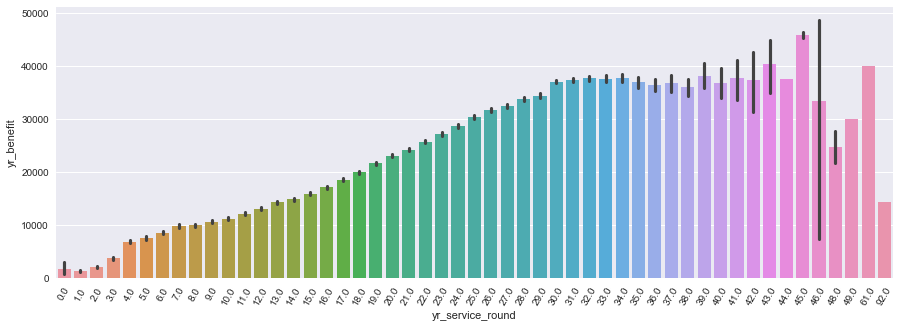

In [43]:
plt.figure(figsize=(15,5))
sns.barplot(x='yr_service_round',y='yr_benefit',data=df[df['yr_benefit']<50000])
plt.xticks(rotation=60)
plt.show()

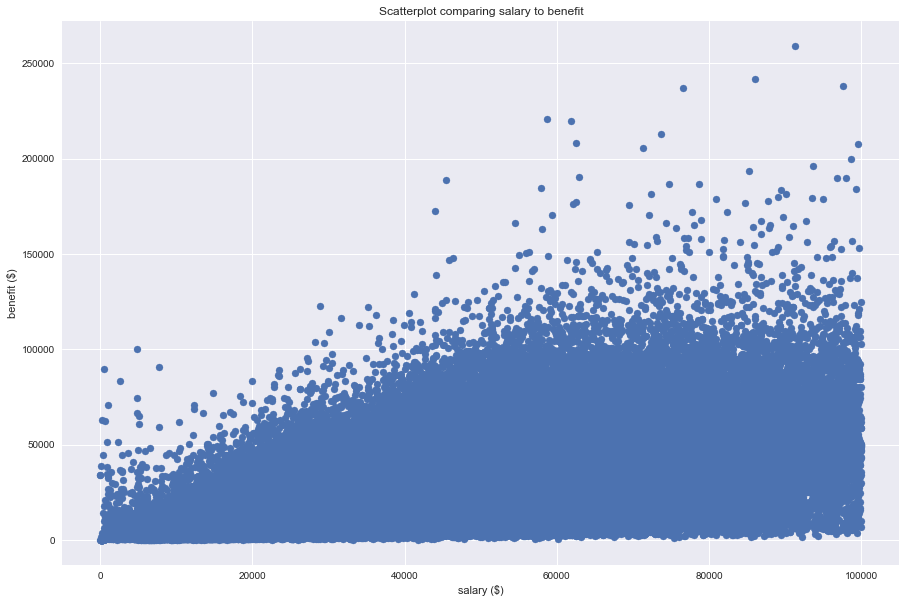

In [44]:
plt.figure(figsize=(15,10))
plt.scatter(df['yr_salary'][df['yr_salary']<100000],df['yr_benefit'][df['yr_salary']<100000])
plt.xlabel('salary ($)')
plt.ylabel('benefit ($)')
plt.title('Scatterplot comparing salary to benefit')
plt.show()

Here we have a scatter plot of salary vs benefit. Our dataset comprises of points in almost every space! There seems to be a soft boundry of the benefit not exceeding the salary and benefit being capped at $100,000 for most people. There are two things that are counter intuitive to this that are worth exploring:

** what are the exceptions to the above stated rules? There are people who have an average salary of less than $10,000 who are taking in a benefit of almost 10 times as much! 

** On the other hand, there seems to be people who get zero or near zero benefit despite having a $100,000 salary. How are they note getting such little benefits?

In [45]:
df[df['yr_benefit']<10000].describe(include='all')

,id,retire,plan,calc,yr_benefit,yr_service,yr_salary,ben_sal_ratio,yr_service_dt,hire_date,yr_ben_cat,year,yr_service_round
count,26270.000000,26270,26270,26270,26270.000000,26270.000000,26270.000000,26270.000000,26270,26270,26270,26270.000000,26270.000000
unique,NaN,531,9,3,NaN,NaN,NaN,NaN,NaN,7478,1,NaN,NaN
top,NaN,1998-03-01 00:00:00,Tier One,Full Formula,NaN,NaN,NaN,NaN,NaN,2004-06-30 13:48:00,"(-1, 25000]",NaN,NaN
freq,NaN,425,16067,12443,NaN,NaN,NaN,NaN,NaN,41,26270,NaN,NaN
first,NaN,1965-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932-08-01 01:22:48,NaN,NaN,NaN
last,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-30 18:10:48,NaN,NaN,NaN
mean,64649.282185,NaN,NaN,NaN,5601.852187,10.317774,26439.934573,0.326547,3612 days 13:52:05.008298,NaN,NaN,2004.533803,10.299695
std,37525.611600,NaN,NaN,NaN,2564.148276,5.320448,18484.536173,0.382952,1949 days 23:11:56.561357,NaN,NaN,9.923940,5.330929
min,9.000000,NaN,NaN,NaN,13.560000,0.083333,25.592629,0.005852,0 days 00:00:00,NaN,NaN,1965.000000,0.000000
25%,32167.250000,NaN,NaN,NaN,3559.740000,6.250000,13529.610000,0.139048,2191 days 10:55:12,NaN,NaN,1998.000000,6.000000


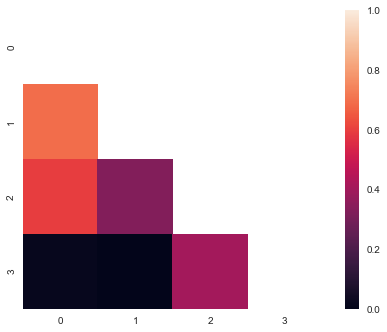

In [46]:
coeffs = np.corrcoef([df['yr_benefit'],df['yr_service'],df['yr_salary'],df['year']])  
mask = np.zeros_like(coeffs)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(coeffs, mask=mask, vmax=1, square=True)

In [47]:
df.groupby(['year','calc'])['hire_date'].count().unstack()

calc,50% FAS P & F,Formula Plus Annuity,Full Formula,Money Match
year,,,,
1965,NaN,NaN,1.0,NaN
1966,NaN,NaN,1.0,NaN
1969,NaN,NaN,2.0,NaN
1970,NaN,NaN,2.0,NaN
1971,NaN,NaN,3.0,NaN
1972,NaN,NaN,3.0,NaN
1973,NaN,NaN,5.0,2.0
1974,NaN,NaN,6.0,NaN
1975,NaN,NaN,10.0,9.0


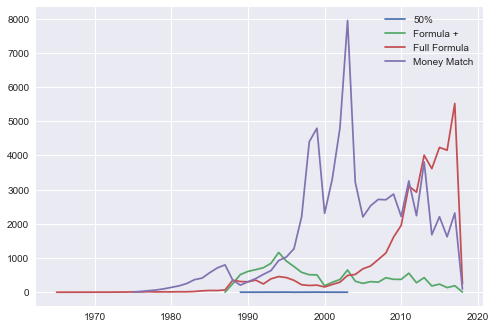

In [48]:
plt.plot(df.groupby(['year','calc'])['hire_date'].count().unstack())
plt.legend(['50%','Formula +','Full Formula','Money Match'])
plt.show()

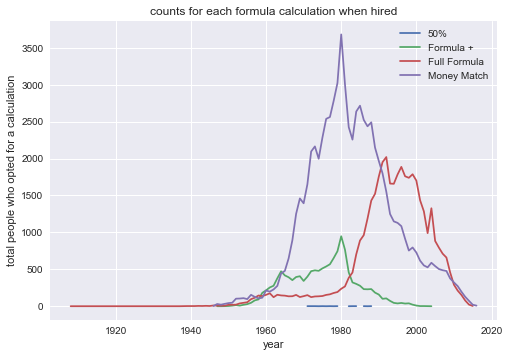

In [49]:
df['year_hire'] = df["hire_date"].dt.year

plt.plot(df.groupby(['year_hire','calc'])['hire_date'].count().unstack())
plt.legend(['50%','Formula +','Full Formula','Money Match'])
plt.title('counts for each formula calculation when hired')
plt.ylabel('total people who opted for a calculation')
plt.xlabel('year')
plt.show()